# Cálculo de volatilidade de uma ação

### Importando as bibliotecas

In [20]:
import mplcyberpunk
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

- mplcyberpunk - Estilizar o gráfico
- yfinance - Fonte dos dados
- pandas - Manipulação do Dataframe
- matplotlib - Gráfico
- numpy - Funções matemáticas

### Importando os dados do yFinance

#### Buscando dados das ações da Tesla, Apple, Amazon e Google desde 2010

In [22]:
df = pd.DataFrame(yf.download("TSLA AAPL AMZN GOOGL",'2010-12-31'))
df.head(5)

[*********************100%%**********************]  4 of 4 completed


Adj Close                                   Close          \
                 AAPL    AMZN      GOOGL      TSLA       AAPL    AMZN   
Date                                                                    
2010-12-31   9.778136  9.0000  14.864114  1.775333  11.520000  9.0000   
2011-01-03   9.990639  9.2110  15.123874  1.774667  11.770357  9.2110   
2011-01-04  10.042781  9.2505  15.068068  1.778000  11.831786  9.2505   
2011-01-05  10.124929  9.3710  15.241992  1.788667  11.928571  9.3710   
2011-01-06  10.116748  9.2930  15.352853  1.858667  11.918929  9.2930   

                                      High          ...        Low            \
                GOOGL      TSLA       AAPL    AMZN  ...      GOOGL      TSLA   
Date                                                ...                        
2010-12-31  14.864114  1.775333  11.552857  9.1150  ...  14.815566  1.766667   
2011-01-03  15.123874  1.774667  11.795000  9.3000  ...  14.926927  1.726667   
2011-01-04  15.068068  1.778000  11.875000  9.3850  ...  15.018018  1.734667   
2011-01-05  15.241992  1.788667  11.940714  9.3725  ...  15.016266  1.746000   
2011-01-06  15.352853  1.858667  11.973214  9.3705  ...  15.266517  1.787333   

                 Open                                  Volume             \
                 AAPL    AMZN      GOOGL      TSLA       AAPL       AMZN   
Date                                                                       
2010-12-31  11.533929  9.0980  14.933433  1.771333  193508000   69038000   
2011-01-03  11.630000  9.0685  14.926927  1.789333  445138400  106628000   
2011-01-04  11.872857  9.3075  15.155656  1.777333  309080800  100636000   
2011-01-05  11.769643  9.2050  15.016767  1.765333  255519600   68376000   
2011-01-06  11.954286  9.3250  15.282282  1.788667  300428800   63594000   

                                 
                GOOGL      TSLA  
Date                             
2010-12-31   61510428  21268500  
2011-01-03   94513392  19245000  
2011-01-04   72907020  17811000  
2011-01-05  101190708  21700500  
2011-01-06   82229688  30918000  

[5 rows x 24 columns]

### Análise dos dados

#### Para a análise vou utilizar apenas os preços de fechamento das ações

In [8]:
df = pd.DataFrame(yf.download("TSLA AAPL AMZN GOOGL",'2010-12-31')['Adj Close'].dropna())
df

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOGL,TSLA
Date,,,,
2010-12-31,9.778135,9.000000,14.864114,1.775333
2011-01-03,9.990639,9.211000,15.123874,1.774667
2011-01-04,10.042781,9.250500,15.068068,1.778000
2011-01-05,10.124930,9.371000,15.241992,1.788667
2011-01-06,10.116747,9.293000,15.352853,1.858667
...,...,...,...,...
2023-10-11,179.800003,131.830002,140.550003,262.989990
2023-10-12,180.710007,132.330002,138.970001,258.869995
2023-10-13,178.850006,129.789993,137.360001,251.119995


#### Calculando a volatilidade anual dos preços

- retornos_diarios - O método pct_change() calcula a variação percentual entre valores consecutivos.
- vol_diaria - É feito o cálculo de desvio padrão dos retornos junto com a função rolling(), que permite realizar operações consecutivas dentro de uma janela definida. A janela definida foi 252, que é geralmente o valor que o mercado financeiro assume como dias úteis em um ano. 
- vol_anual - Anualizamos a volatilidade diária multiplicando pela raíz quadrada de 252

In [19]:
retornos_diarios = df.pct_change().dropna()
vol_diaria = retornos_diarios.rolling(252).std().dropna()
vol_anual = vol_diaria * np.sqrt(252)

display(retornos_diarios)
display(vol_diaria)
display(vol_anual)

,AAPL,AMZN,GOOGL,TSLA
Date,,,,
2011-01-03,0.021733,0.023444,0.017476,-0.000375
2011-01-04,0.005219,0.004288,-0.003690,0.001878
2011-01-05,0.008180,0.013026,0.011543,0.005999
2011-01-06,-0.000808,-0.008324,0.007273,0.039135
2011-01-07,0.007161,-0.001991,0.004792,0.012912
...,...,...,...,...
2023-10-11,0.007904,0.018150,0.018036,-0.002390
2023-10-12,0.005061,0.003793,-0.011242,-0.015666
2023-10-13,-0.010293,-0.019195,-0.011585,-0.029938


,AAPL,AMZN,GOOGL,TSLA
Date,,,,
2011-12-30,0.016539,0.024192,0.018577,0.032161
2012-01-03,0.016513,0.024243,0.018641,0.032180
2012-01-04,0.016513,0.024248,0.018640,0.032192
2012-01-05,0.016519,0.024234,0.018650,0.032220
2012-01-06,0.016529,0.024293,0.018666,0.032131
...,...,...,...,...
2023-10-11,0.017034,0.024159,0.021222,0.037639
2023-10-12,0.017020,0.024144,0.021231,0.037606
2023-10-13,0.017032,0.024175,0.021247,0.037657


,AAPL,AMZN,GOOGL,TSLA
Date,,,,
2011-12-30,0.262556,0.384042,0.294906,0.510541
2012-01-03,0.262130,0.384852,0.295915,0.510843
2012-01-04,0.262132,0.384927,0.295908,0.511030
2012-01-05,0.262229,0.384709,0.296054,0.511473
2012-01-06,0.262391,0.385637,0.296312,0.510069
...,...,...,...,...
2023-10-11,0.270402,0.383511,0.336891,0.597504
2023-10-12,0.270187,0.383274,0.337028,0.596974
2023-10-13,0.270370,0.383766,0.337280,0.597793


### Visualização das informações

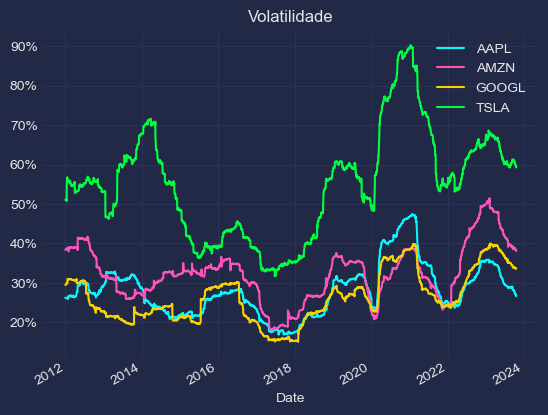

In [12]:
plt.style.use('cyberpunk')
ax = vol_anual.plot(title = "Volatilidade")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.show()